In [41]:
# Importing Libraries
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [9]:
# # Load the Bank Marketing dataset

df = pd.read_csv("bank-additional-full.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Check the first few rows

print(df.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [6]:
# Convert the target variable 'y' to binary
df['y'] = df['y'].map({'yes': 1, 'no': 0})


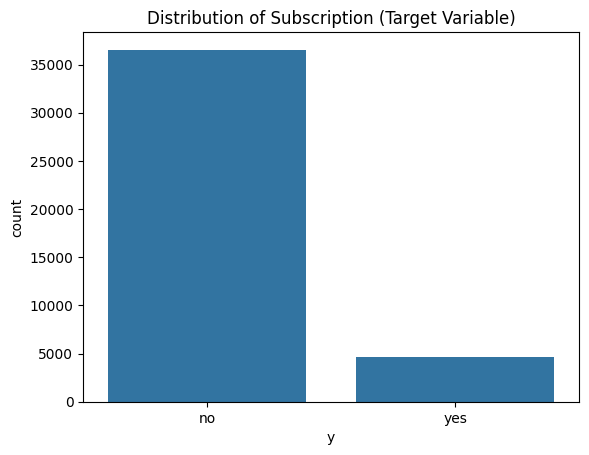

In [10]:
# Basic distribution of target variable
sns.countplot(x='y', data=df)
plt.title('Distribution of Subscription (Target Variable)')
plt.show()

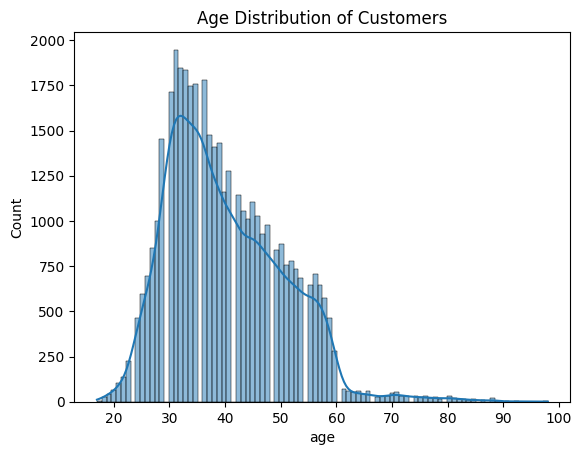

In [11]:
# Age distribution plot
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution of Customers')
plt.show()

In [12]:
# Convert categorical variables
X = df.drop('y', axis=1)
y = df['y']

In [14]:
categorical_columns = X.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder()
X[categorical_columns] = encoder.fit_transform(X[categorical_columns])

We visualized the distribution of the target variable y (subscription) to understand how many customers subscribed compared to those who didn't. We also visualized the distribution of customers’ ages, which is a key demographic feature.

Splitting the Data and Training the Decision Tree
we’ll split the data into training and testing sets. Afterward, we’ll train a decision tree classifier.

In [49]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the maximum depth for the decision tree
max_depth = 3

# Train the decision tree classifier
model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

We split the dataset 80/20 for training and testing, and trained a decision tree with a maximum depth of 5. This balances between capturing the complexity of the data and preventing overfitting.

Model Evaluation and Visualizing Confusion Matrix
We will evaluate the performance of the model using accuracy, the confusion matrix, and a classification report. A confusion matrix provides a clear visual representation of correct and incorrect predictions.

In [19]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [20]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.91


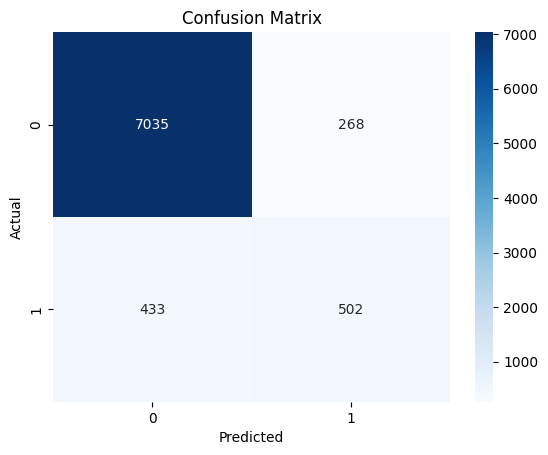

In [22]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.96      0.95      7303
         yes       0.65      0.54      0.59       935

    accuracy                           0.91      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238



The confusion matrix heatmap shows how well the model performed in predicting whether customers subscribed to the term deposit. The classification report provides detailed metrics like precision, recall, and F1-score, offering a comprehensive look at the model's accuracy for both classes (subscribed vs. not subscribed).

The accuracy score shows how well the model predicted compared to the actual values. The classification report provides additional insights, such as precision, recall, and F1-score.


Visualizing Feature Importance
To understand which features most influence the model’s predictions, we can plot the feature importance derived from the decision tree.

In [30]:
# Get feature importance
importance = model.feature_importances_
features = X.columns

In [26]:
# Creating DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

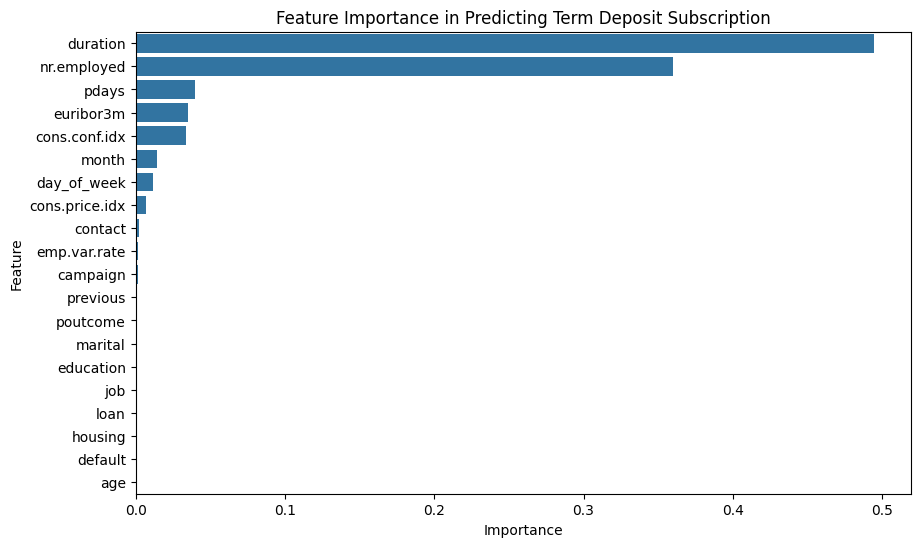

In [27]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Predicting Term Deposit Subscription')
plt.show()

The feature importance plot helps us identify which factors (such as previous campaigns, age, or job type) most strongly influence whether a customer will subscribe to a term deposit. Understanding these key features can inform future marketing strategies.

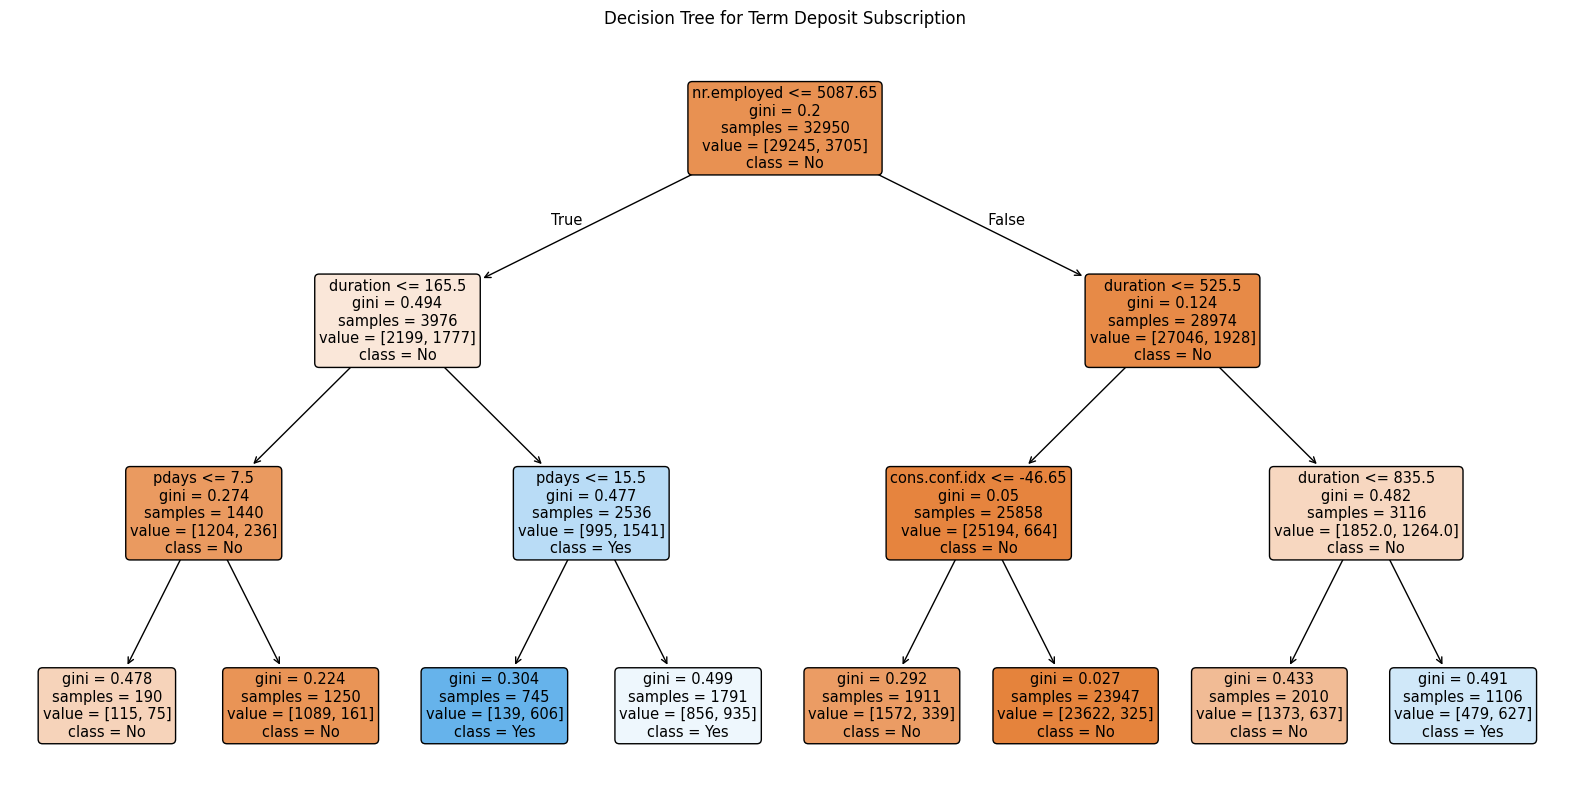

In [50]:
# Set the figure size for the decision tree plot
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)

# Show the plot with a title
plt.title('Decision Tree for Term Deposit Subscription')
plt.show()



This visual representation helps understand the structure of the decision tree, the splits at each node, and the rules that were learned by the model.


In [42]:
# Save the trained model
joblib.dump(model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']